<a href="https://colab.research.google.com/github/rakeshsurampalli/smart_investment/blob/master/time_seires_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files
from pandas import datetime
import matplotlib.pyplot as plt


In [0]:
uploaded = files.upload()

Saving reliance12.csv to reliance12.csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "reliance12.csv" with length 743 bytes


In [0]:
import io

In [0]:
def parser(x):
  return datetime.strptime(x,'%d/%m/%y')

sales = pd.read_csv(io.StringIO(uploaded['reliance12.csv'].decode('utf-8')),index_col=0,parse_dates=[0],date_parser=parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [0]:
sales.head()

,Close
Date,
2019-04-18,1385.949951
2019-04-22,1345.349976
2019-04-23,1363.849976
2019-04-24,1389.500000
2019-04-25,1372.400024


In [0]:
sales.Close

Date
2019-04-18    1385.949951
2019-04-22    1345.349976
2019-04-23    1363.849976
2019-04-24    1389.500000
2019-04-25    1372.400024
2019-04-26    1392.800049
2019-04-30    1392.800049
2019-05-02    1405.050049
2019-05-03    1408.849976
2019-05-06    1384.900024
2019-05-07    1343.500000
2019-05-08    1299.449951
2019-05-09    1256.449951
2019-05-10    1251.150024
2019-05-13    1232.050049
2019-05-14    1260.449951
2019-05-15    1256.900024
2019-05-16    1265.349976
2019-05-17    1267.400024
2019-05-20    1325.900024
2019-05-21    1339.800049
2019-05-22    1340.400024
2019-05-23    1333.900024
2019-05-24    1336.849976
2019-05-27    1310.650024
2019-05-28    1323.750000
2019-05-29    1313.050049
2019-05-30    1329.750000
2019-05-31    1330.150024
2019-06-03    1360.199951
2019-06-04    1351.650024
2019-06-06    1327.349976
2019-06-07    1314.900024
2019-06-10    1319.150024
Name: Close, dtype: float64

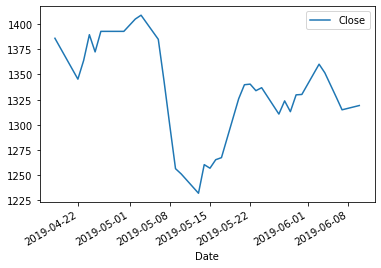

In [0]:
sales.plot()

auto correlation function

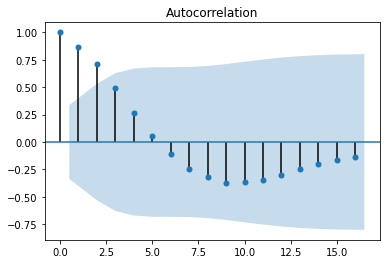

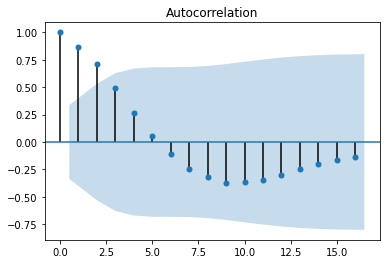

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

stationarity


In [0]:
sales_diff = sales.diff(periods=1)


In [0]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Close
Date,
2019-04-22,-40.599975
2019-04-23,18.500000
2019-04-24,25.650024
2019-04-25,-17.099976
2019-04-26,20.400025


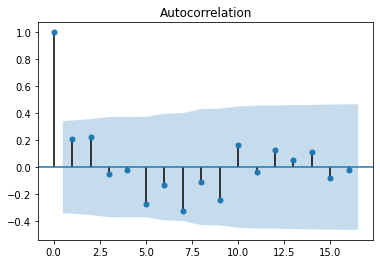

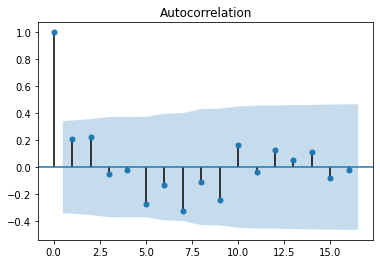

In [0]:
plot_acf(sales_diff)

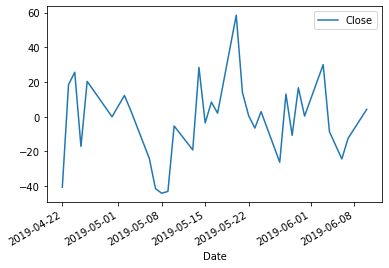

In [0]:
sales_diff.plot()

In [0]:
X = sales.Close
print(X)
X.size
train = X[0:25]#25
test = X[25:] #9
predictions = []

Date
2019-04-18    1385.949951
2019-04-22    1345.349976
2019-04-23    1363.849976
2019-04-24    1389.500000
2019-04-25    1372.400024
2019-04-26    1392.800049
2019-04-30    1392.800049
2019-05-02    1405.050049
2019-05-03    1408.849976
2019-05-06    1384.900024
2019-05-07    1343.500000
2019-05-08    1299.449951
2019-05-09    1256.449951
2019-05-10    1251.150024
2019-05-13    1232.050049
2019-05-14    1260.449951
2019-05-15    1256.900024
2019-05-16    1265.349976
2019-05-17    1267.400024
2019-05-20    1325.900024
2019-05-21    1339.800049
2019-05-22    1340.400024
2019-05-23    1333.900024
2019-05-24    1336.849976
2019-05-27    1310.650024
2019-05-28    1323.750000
2019-05-29    1313.050049
2019-05-30    1329.750000
2019-05-31    1330.150024
2019-06-03    1360.199951
2019-06-04    1351.650024
2019-06-06    1327.349976
2019-06-07    1314.900024
2019-06-10    1319.150024
Name: Close, dtype: float64


In [0]:
test.size


7

AR MODEL

In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar = AR(train)
model_ar_fit = model_ar.fit()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


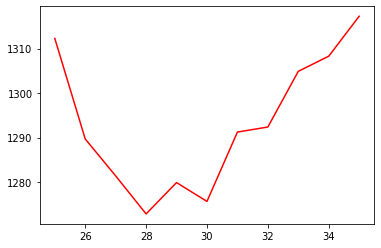

In [0]:
predictions = model_ar_fit.predict(start=25,end=35)
plt.plot(predictions,color="red")

In [0]:
test


Date
2019-05-28    1323.750000
2019-05-29    1313.050049
2019-05-30    1329.750000
2019-05-31    1330.150024
2019-06-03    1360.199951
2019-06-04    1351.650024
2019-06-06    1327.349976
2019-06-07    1314.900024
2019-06-10    1319.150024
Name: Close, dtype: float64

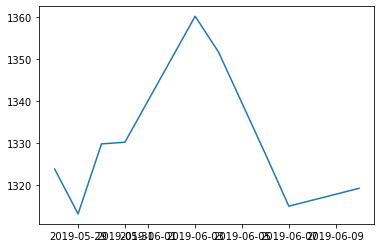

In [0]:
plt.plot(test)


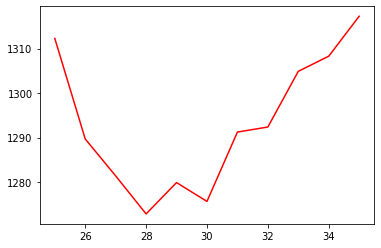

In [0]:
plt.plot(predictions,color="red")

ARIMA MODEL

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
#p,d,q

model_arima = ARIMA(train,order=(7,2,1))
model_arima_fit = model_arima.fit()


In [139]:
predictions = model_arima_fit.forecast(steps=9)[0]
predictions

array([1306.98197523, 1283.46810382, 1281.9028533 , 1288.68241976,
       1308.55292028, 1323.10857189, 1355.04648582, 1375.77557382,
       1404.04190841])

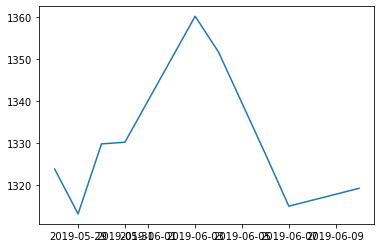

In [93]:
plt.plot(test)


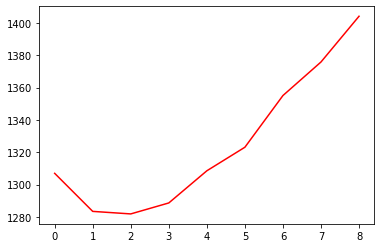

In [140]:
plt.plot(predictions,color="red")

In [141]:
mean_squared_error(test,predictions)

2258.5290348643002

In [128]:
import itertools
p=d=q=range(0,7)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1,

In [129]:
import warnings
warnings.filterwarnings("ignore") 
for param in pdq:
  try:
    model_arima = ARIMA(train,order=param)
    model_arima_fit = model_arima.fit()
    print(param,model_arima_fit.aic)
  except:
    continue


(0, 0, 0) 274.7263785856866
(0, 0, 1) 257.0022406926338
(0, 0, 4) 239.65393588098976
(0, 0, 5) 241.48581245276932
(0, 1, 0) 226.62019104090123
(0, 1, 1) 227.19522713136402
(0, 1, 2) 227.88433581019444
(0, 1, 3) 229.77062125783138
(0, 1, 4) 231.56226412358978
(0, 1, 5) 231.01347708797437
(0, 1, 6) 232.87194448963788
(0, 2, 0) 224.82532060156657
(0, 2, 1) 222.38821725206714
(0, 2, 2) 224.35403087575946
(0, 2, 3) 223.9138949227181
(0, 2, 4) 225.70161075079898
(0, 2, 5) 227.3179298421257
(0, 2, 6) 227.67587161449939
(1, 0, 0) 238.04980328903224
(1, 0, 1) 238.3775624055168
(1, 0, 2) 238.68723577374024
(1, 0, 3) 240.09124592320146
(1, 0, 4) 241.3569828905623
(1, 0, 5) 244.53493199898267
(1, 1, 0) 226.5667092965279
(1, 1, 1) 228.29922972206484
(1, 1, 2) 229.7476992405336
(1, 2, 0) 222.48861186439564
(1, 2, 1) 224.2882127451178
(2, 0, 0) 237.19849169034381
(2, 0, 1) 237.62100825593242
(2, 0, 2) 239.09185377229832
(2, 0, 3) 240.75663352288313
(2, 0, 4) 242.80199472745645
(2, 1, 0) 227.973579062